<a href="https://colab.research.google.com/github/JhonnyLimachi/Sigmoidal/blob/main/31_Feature_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Feature Scaling

Nesta fase do curso, você provavelmente já teve vários insights de que variáveis em escalas diferentes podem impactar o seu modelo.

Termos como padronização, normalização, mesma escala e magnitude são muito importantes para o cientista de dados. Dependendo do algoritmo que você escolher, o resultado pode ser muito prejudicado.

<center><img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/magnitude.jpeg" width="40%"></center>

A realidade é que sim, na esmagadora maioria das vezes, você vai lidar com variáveis de diferentes tipos e diferentes escalas. Aprofundar no tema dessa aula é importante. No entanto, não se limite apenas a este notebook ou àquilo que foi mencionado no vídeo. **Use as referências e links!**
<center><img src="https://images.unsplash.com/photo-1604247416063-e0e6aaf47b0b?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="40%"></center>

**Quando usar técnicas de feature scaling?**

Resumidamente, você vai procurar usar feature scaling quando estiver trabalhando com algoritmos baseados em **gradient descent** ou algoritmos baseados em **distância**.

Algoritmos baseados em gradiente atualizam seus parâmetros individualmente. Ou seja, escalas diferentes irão fazer muita diferença.

Da mesma maneira, algoritmos baseados em distância usam a distância entre pontos (dados) para estabelecer o grau de similaridade. Magnitudes extremas irão fazer com que o algoritmo privilegie algumas features desde o seu primeiro contato com elas.

**E os algoritmos baseados em árvores?**

Algoritmos baseados em árvores são insensíveis às diferentes escalas das features. Isso é devido ao fato que ele cria nós de decisão baseando-se unicamente em cada feature isoladamente.

## Padronização

Padronização é quando as features sofrem uma mudança de escala, e passa a ter as propriedades de uma distribuição normal com média $\mu = 0$ e desvio padrão $\sigma = 1$.

Na padronização, os z-scores são calculados da seguinte maneira:

$$
z = \frac{x - \mu}{\sigma}
$$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/wine_data.csv", header=None)
df = df.iloc[:,0:3].copy()
df.columns = ['Label', 'Alcohol', 'MalicAcid'
]

df.head()

,Label,Alcohol,MalicAcid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


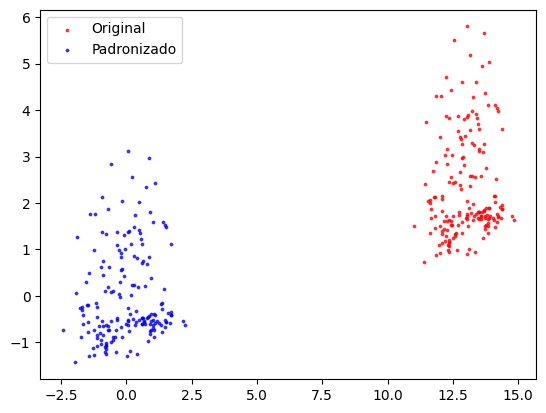

In [2]:
# padronização
std = StandardScaler().fit_transform(df[['Alcohol', 'MalicAcid']])

# plotar
fig, ax = plt.subplots()
ax.scatter('Alcohol', 'MalicAcid', c='red', s=3, label='Original', alpha=.7, data=df)
ax.scatter(std[:,0], std[:,1], c='blue', s=3, label='Padronizado', alpha=.7)
plt.legend(loc='upper left')
plt.show()

## Normalização

Basicamente, a normalização coloca os dados dentro de uma escala $[0, 1]$. Apesar de não ser a única forma de normalização, utiliza-se mais frequentemente o `Min-Max scaling`, que é calculado da seguinte maneira:

$$
X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

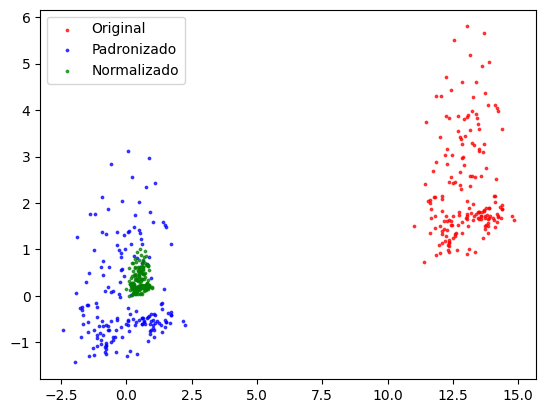

In [3]:
# padronização
minmax = MinMaxScaler().fit_transform(df[['Alcohol', 'MalicAcid']])

# plotar
fig, ax = plt.subplots()
ax.scatter('Alcohol', 'MalicAcid', c='red', s=3, label='Original', alpha=.7, data=df)
ax.scatter(std[:,0], std[:,1], c='blue', s=3, label='Padronizado', alpha=.7)
ax.scatter(minmax[:,0], minmax[:,1], c='green', s=3, label='Normalizado', alpha=.7)
plt.legend(loc='upper left')
plt.show()

**Quando padronizar ou normalizar?**

Não há uma resposta óbiva e única para isso. Depende muito do algoritmo, aplicação e dados que você está usando.

Veja alguns exemplos:
* A padronização é essencial na análise de clusters, uma vez que se compara a similaridade das features por meio das distâncias.
* A padronização é mais desejável no PCA, por causa da maximização da variância.
* As imagens RGB, com escala original entre 0 e 255, devem levar essa intensidade de pixels para valores entre 0 e 1, ou seja, preferiremos normalizar os valores.
* Redes neurais normalmente irão esperar valores normalizados entre 0 e 1.
* Normalização é muito mais sensível à presença de outliers.

## Exemplo visual

Fonte: [Documentação do Scikit-Learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

In [4]:
# Author:  Raghav RV <rvraghav93@gmail.com>
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Thomas Unterthiner
# License: BSD 3 clause

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing

print(__doc__)

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

# Take only 2 features to make visualization easier
# Feature of 0 has a long tail distribution.
# Feature 5 has a few but very large outliers.

X = X_full[:, [0, 5]]

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, 'plasma_r', cm.hot_r)

def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

Automatically created module for IPython interactive environment


In [5]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')

### Dados Originais

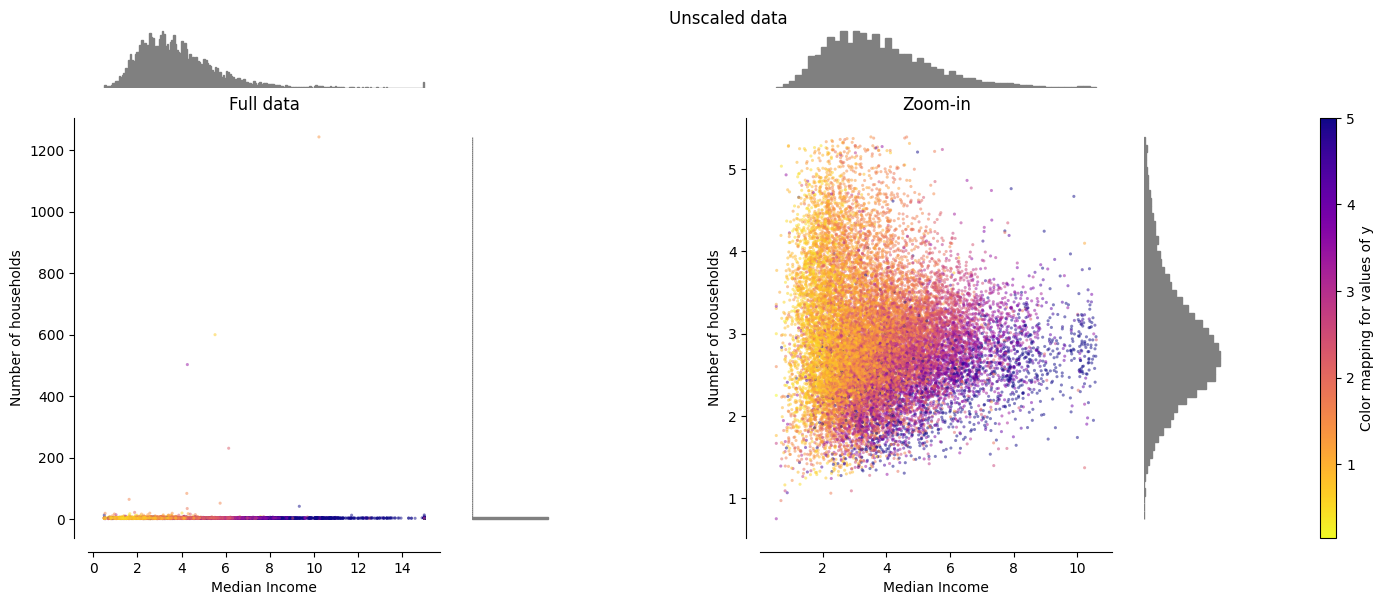

In [6]:
make_plot(0)

### StandardScaler

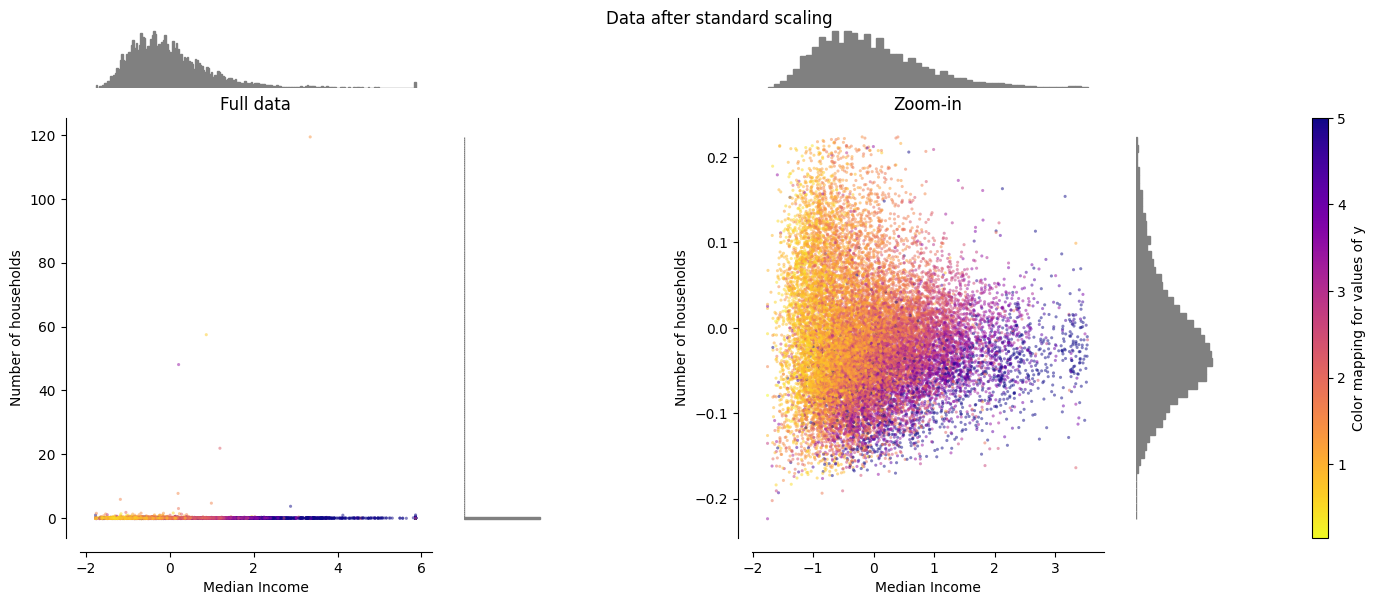

In [7]:
make_plot(1)

### MinMaxScaler

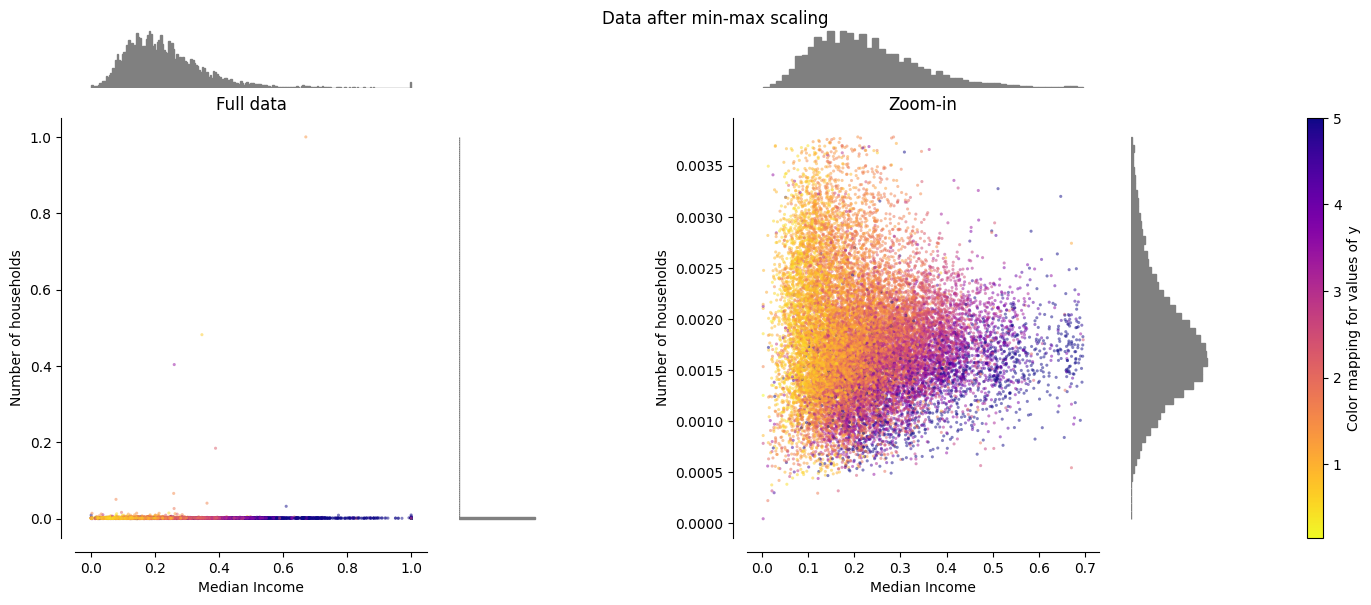

In [8]:
make_plot(2)

### PowerTransformer

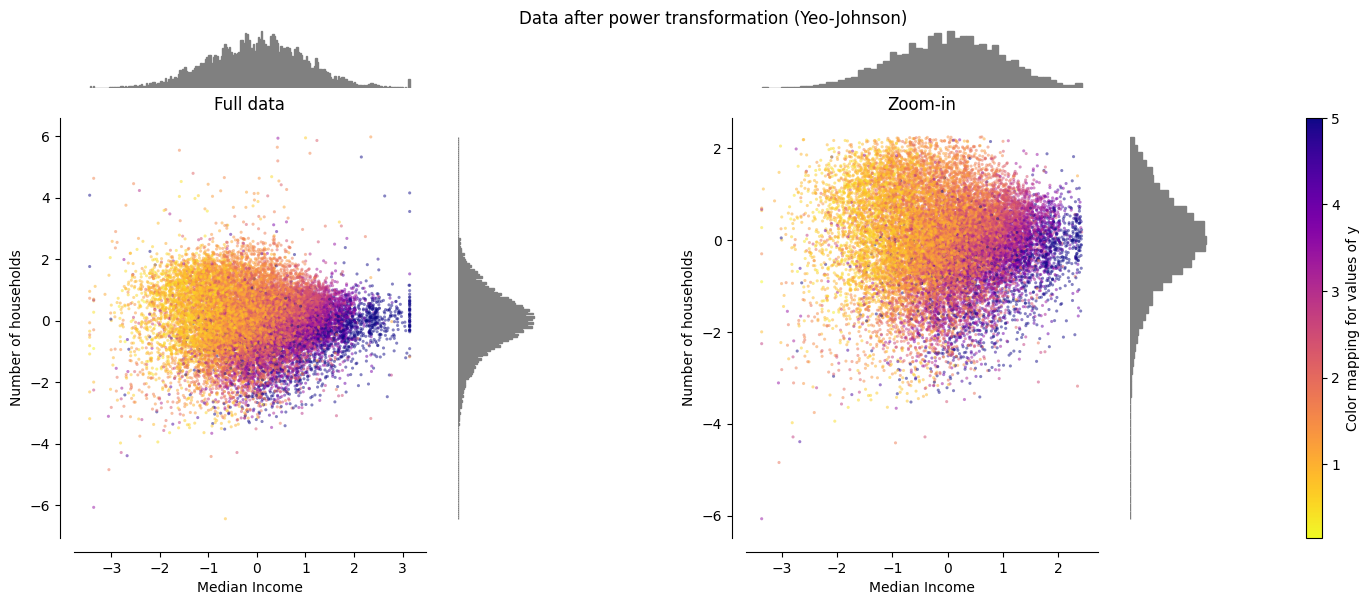

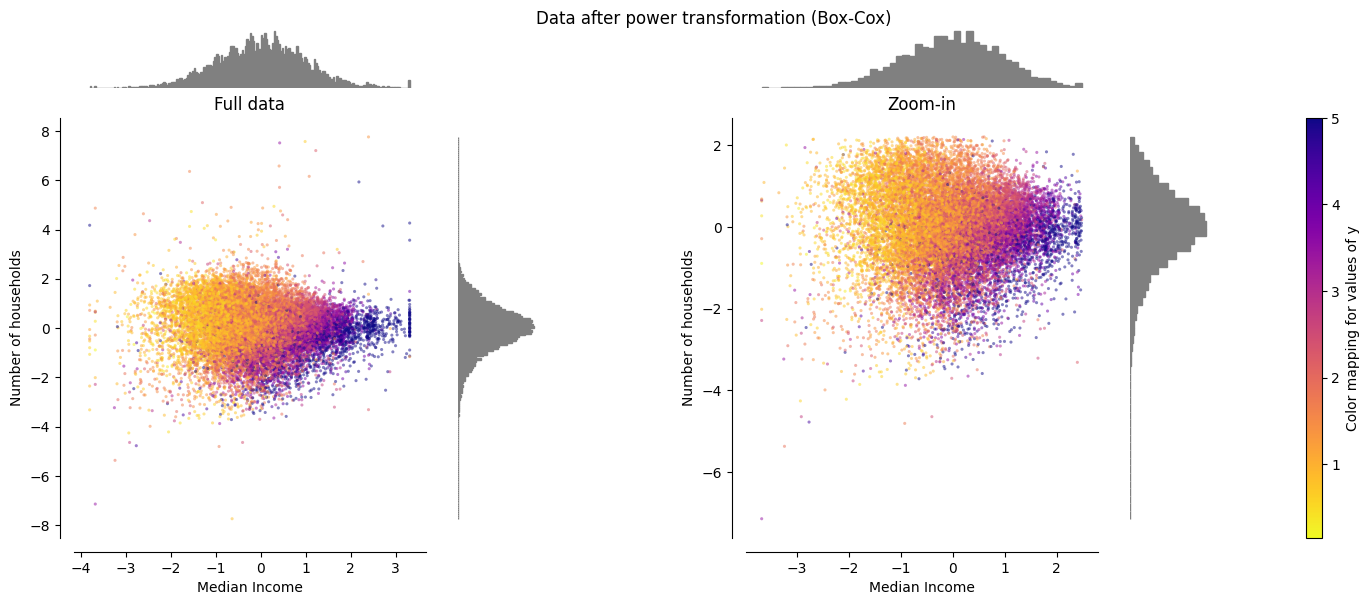

In [9]:
make_plot(5)
make_plot(6)

### QuantileTransformer (uniform output)

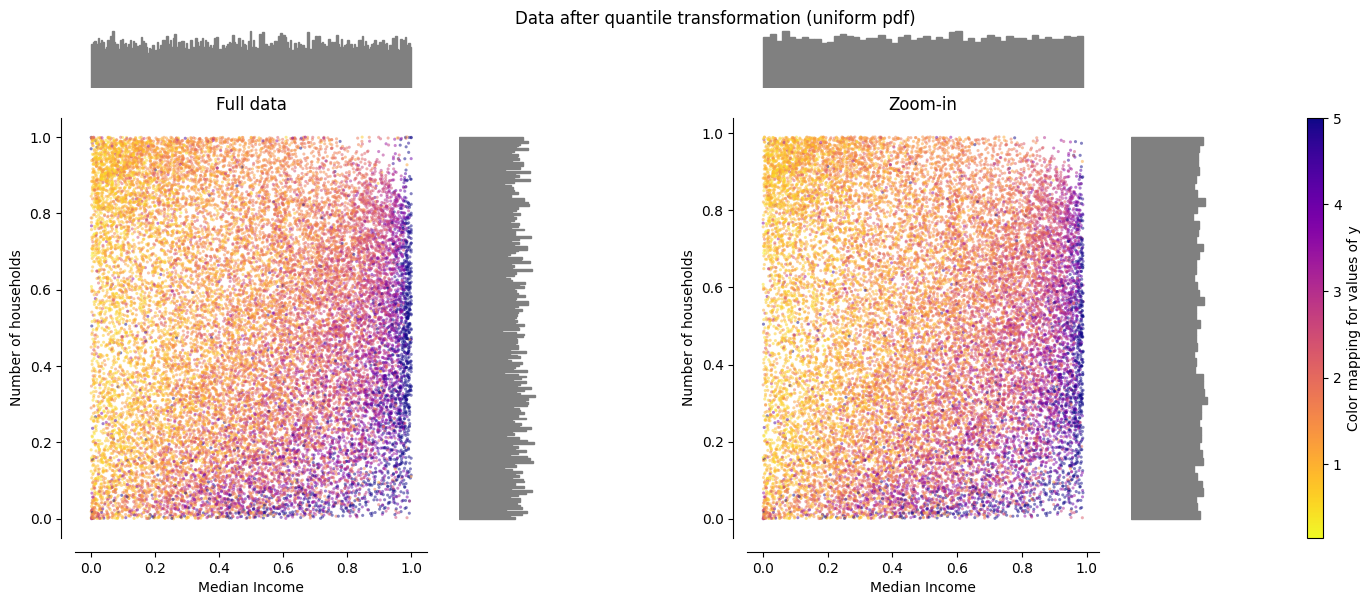

In [10]:
make_plot(8)

## **Extra: Feature Scaling**

Nesta fase do curso, você provavelmente já teve vários insights de que variáveis em escalas diferentes podem impactar o seu modelo.

Termos como padronização, normalização, mesma escala e magnitude são muito importantes para o cientista de dados. Dependendo do algoritmo que você escolher, o resultado pode ser muito prejudicado.

A realidade é que sim, na esmagadora maioria das vezes, você vai lidar com variáveis de diferentes tipos e diferentes escalas. Aprofundar no tema dessa aula é importante. No entanto, não se limite apenas a este notebook ou àquilo que foi mencionado no vídeo.Use as referências e links!

# **Referências**


[About Feature Scaling and Normalization](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html) (Sebastian Raschka)

[Feature Scaling for Machine Learning: Understanding the Difference Between
Normalization vs. Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

[Normalization vs Standardization — Quantitative analysis](https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf)

[Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)